# B5. Large-Sample Confidence Intervals

In this chapter, you will ... calculate many of the large-sample confidence intervals described in Sections 1 and 3 of Unit 8.
You will first see how to find large-sample confidence intervals for population means.
You will then learn how to find large-sample confidence intervals for proportions, and for differences between proportions.

In [1]:
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

## Computer Activity 15

> Data on strengths of glass fibres of length 1.5 cm are in the `csv` file **glass-fibres.csv**.

In [2]:
df_glass_fibres = pd.read_csv("data/glass-fibres.csv")

In [3]:
df_glass_fibres.describe()

,Strength
count,63.000000
mean,1.506825
std,0.324126
min,0.550000
25%,1.375000
50%,1.590000
75%,1.685000
max,2.240000


### (a)

> Calculate the appropriate summary statistics for the variable Strength, including the mean and standard deviation, and obtain a histogram of the data.

In [4]:
# Mean of Strength
df_glass_fibres["Strength"].mean()

1.5068253968253966

In [5]:
# Sample variance
df_glass_fibres["Strength"].std()

0.3241257491778182

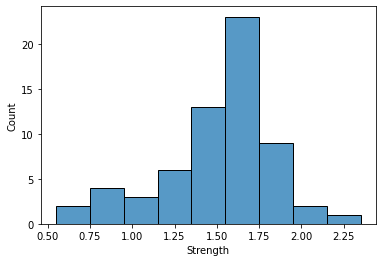

In [6]:
ax = sns.histplot(data=df_glass_fibres,
                  x="Strength",
                  binwidth=0.2)
plt.show()

Note, this doesn't match the example plot in the textbook.
Comparing the two with the data, it seems that the textbook version is incorrect (the bar for the 1.4:1.6 is not large enough).

### (b)

> Obtain 90% and 95% confidence intervals for the mean strength of glass fibres.
> Which of the 90% and 95% confidence intervals for the mean strength of glass fibres actually is the wider?
> Does this agree with what you expected?
> Why?

In [7]:
# paramters
mean = df_glass_fibres["Strength"].mean()
std = df_glass_fibres["Strength"].std()
size = df_glass_fibres["Strength"].size

In [8]:
glass_fibres = norm(loc=mean, scale=std/sqrt(size))

In [9]:
# 90% confidence interval
glass_fibres.interval(alpha=0.9)

(1.4396561442588514, 1.573994649391942)

In [10]:
# 95% confidence interval
glass_fibres.interval(alpha=0.95)

(1.4267882958081477, 1.5868624978426455)

The 95% confidence interval is wider than the 90% confidence interval.
This is because a higher confidence level means more confidence that the interval contains the population mean and so has to contain more values.

## Computer activity 18

> The `csv` file accidents.csv contains data on the number of accidents suffered by each of 414 machinists over a period of time.
> The aim of this activity is to estimate the proportion of machinists who experience at least one accident.

In [11]:
df_accidents = pd.read_csv("data/accidents.csv")

### (a)

> The data consist of one column named Accidents, containing the accident frequencies for the 414 machinists.
> Obtain the distribution of the number of accidents suffered by each worker

Let us first create a `pd.series` with the frequency of each number of accients.

In [12]:
v_accident_freq = df_accidents.groupby(by="Accidents")["Accidents"].count()

In [13]:
# reset the index, naming the original series
# which holds the count as "Frequency"
v_accident_freq = v_accident_freq.reset_index(name="Frequency")

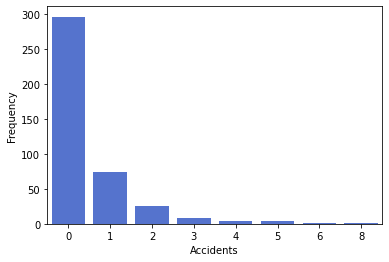

In [14]:
ax = sns.barplot(data=v_accident_freq,
                 x="Accidents",
                 y="Frequency",
                 color="royalblue")
plt.show()

### (b)

> Estimate the proportion of workers who experience one or more accidents, and obtain an approximate 99% confidence interval for this proportion.

Let us first obtain the estimate $\widehat p$.

In [25]:
v_accident_freq.head()

,Accidents,Frequency
0,0,296
1,1,74
2,2,26
3,3,8
4,4,4


In [15]:
# sum the total accidents > 0
had_accident = v_accident_freq.query("Accidents != 0")["Frequency"].sum()
# sum the total number of workers
total_workers = v_accident_freq["Frequency"].sum()
# obtain p
p = had_accident/total_workers
p

0.28502415458937197

Therefore the esitmated proportion of workers who had at least 1 accident $\widehat p = 0.285$.

Now let us estimate the standard error,

$$
\sqrt{\frac{\widehat p (1-\widehat p)}{n}.}
$$

In [16]:
ste = sqrt(p*(1-p)/total_workers)

We can now obtain the approximate 99%CI for $\widehat p$

In [17]:
norm(loc=p, scale=ste).interval(alpha=0.99)

(0.22787583995834104, 0.3421724692204029)

## Computer activity 19

> It has been suggested that snoring might increase the risk of heart disease.
> To investigate this, data were collected on the frequency of snoring among
a sample of people with heart disease and a sample of people without heart
disease.
> We will use this data to construct a large-sample confidence intervals for the difference between two proportions.

The data showed the following results.

|                  | Never | Occasionally | Often | Always |
| ---------------- | ----- | ------------ | ----- | ------ |
| Heart disease    | 24    | 35           | 21    | 30     |
| No heart disease | 1355  | 603          | 192   | 224    |

### (a)

> Estimate the difference between the proportion of people without heart disease who never snore and the proportion with heart disease who never snore.

Let $\widehat p_{1}$ represent the estimated proportion of people with heart disease who never snore, and $\widehat p_{2}$ the estimated proportion of people without heart disease who never snore.

In [18]:
p1 = 24 / (24 + 35 + 21 + 30)
p2 = 1355 / (1355 + 603 + 192 + 224)

So $\widehat p_{1} = \ldots$

In [19]:
p1

0.21818181818181817

and $\widehat p_{2} = \ldots$

In [20]:
p2

0.5707666385846673

Let $\widehat d$ represent the estimated difference between the proportion of people without heart disease who never snore and the proportion with heart disease who never snore, where $\widehat d = \widehat p_{2} - \widehat p_{1} = \ldots$

In [21]:
d = p2 - p1
d

0.3525848204028491

### (b)

> Calculate a 95% confidence interval for the difference between these proportions.

Let us estimate the standard error for both $\widehat p_{1}$ and $\widehat p_{2}$, where the standard error is

$$
\sqrt{\frac{\widehat p_{1} (1-\widehat p_{1})}{n_{1}} + \frac{\widehat p_{2} (1-\widehat p_{2})}{n_{2}}.}
$$

In [22]:
var1 = p1*(1-p1)/(24 + 35 + 21 + 30)
var2 = p2*(1-p2)/(1355 + 603 + 192 + 224)

ste = sqrt(var1 + var2)

We can now obtain the approximate 95%CI for $\widehat d$

In [23]:
norm(loc=d, scale=ste).interval(alpha=0.95)

(0.27287638968801975, 0.43229325111767847)